In [279]:
alpha = np.array([1,2,3])
y = np.array([1,2,3])
X = np.array([[1,2,3], [1,2,3], [1,2,3]])
print np.multiply(alpha, y).dot(( (X.dot(X[1,:])))) + 1
print X.dot(X[1,:])
x = np.mat([[1.2,2.3],[14.5,2.4]])
np.where(x < 1, x, -1)  
print x

197
[14 14 14]
[[  1.2   2.3]
 [ 14.5   2.4]]


In [370]:
# SVM
# -*- coding: utf-8 -*-

"""
SD 207 challenge
SVM
Ideas from machine learning in action
quit until max loop or alpha stop changing
"""

import numpy as np

def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

def selectJRandom(i, t):
    # according to the alpha1 we should choose the second alpha, t is the number of alphas.
    j = i
    while (j == i):
        j = int(np.random.uniform(0, t))
    return j



def calcE(help_svm,k):
    fk = np.multiply(help_svm.alphas, help_svm.y).T*((help_svm.X * (help_svm.X[k,:].T))) + help_svm.b
#     fk = np.multiply(help_svm.alphas, help_svm.y).dot((help_svm.X.dot(help_svm.X[k,:]))) + help_svm.b
#     print help_svm.alphas.shape
#     print help_svm.y.shape
#     print np.multiply(help_svm.alphas, help_svm.y.T).shape
#     print fk
    ek = fk - help_svm.y[k]
    return ek

def selectJ(i ,help_svm, ei):
    k_max = -1
    diffirence_e_max = 0
    ej = 0
    help_svm.cache[i] = [1, ei]
    validcache = np.nonzero(help_svm.cache[:,0].A)[0]
    if len(validcache) > 1:
        for k in validcache:
            if k == i: 
                continue
            ek = calcE(help_svm, k)
            diffirencee = abs(ei - ek)
            if (diffirencee > diffirence_e_max):
                k_max = k
                diffirence_e_max = diffirencee
                ej = ek
        return k_max, ej
    else:
        j = selectJRandom(i, help_svm.n)
        ej = calcE(help_svm,j)
    return j, ej

def updatek(help_svm,k):
    ek = calcE(help_svm, k)
    help_svm.cache[k] = [1,ek]
    

def clipAlpha(aj, H, L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj  
# SVM PAR SMO (Sequential Minimal Optimization)
# Da JU
# get the ideas of the help function from machine learning in action by peter harrington
class SVM_help:
    def __init__(self, X, y, C, tol):
        # initial
        self.X = np.mat(X) # difference between array and mat, * for vector np.mul for dot
        self.y = np.mat(y).transpose()
        self.C = C
        self.tol = tol
        self.n = self.X.shape[0] # length
        self.alphas = np.zeros((self.n, 1))
        self.b = 0.0
        self.cache = np.mat(np.zeros((self.n, 2)) ) # mat to avoid trouble
        # first col is flag, second col is the evalue
    
            

            
            
       
def innerLoop ( i, help_svm):
    # select ajy inner loop to max step size or max  - ej
        ei = calcE(help_svm, i)
#         print ei
        # select the alpha violect KKt
#         print help_svm.y[i] * ei, help_svm.alphas[i] * ei 
        ## wrong
        if (((help_svm.y[i] * ei < -help_svm.tol) and (help_svm.alphas[i] * ei < help_svm.C)) or ((help_svm.y[i]*ei > help_svm.tol) and (help_svm.alphas[i] > 0))):
            j, ej = selectJ(i, help_svm ,ei)
            aplpha_I_old = help_svm.alphas[i].copy()
            aplpha_J_old = help_svm.alphas[j].copy()
            if (help_svm.y[i] != help_svm.y[j]):
                L = max(0, help_svm.alphas[j] - help_svm.alphas[i])
                H = min(help_svm.C, help_svm.C + help_svm.alphas[j] - help_svm.alphas[i])
            else:
                L = max(0, help_svm.alphas[j] + help_svm.alphas[i] - help_svm.C)
                H = min(help_svm.C, help_svm.alphas[j] + help_svm.alphas[i])
            if L==H: 
#                 print "L == H"
                return 0
            eta = 2.0 * help_svm.X[i,:]*help_svm.X[j,:].T - help_svm.X[i,:]*help_svm.X[i,:].T - help_svm.X[j,:]*help_svm.X[j,:].T
            if eta >= 0: 
#                 print "eta >= 0"
                return 0
            help_svm.alphas[j] = help_svm.alphas[j] - help_svm.y[j]*(ei - ej)/eta
            # ensure aj is in the bouding box 
            help_svm.alphas[j] = clipAlpha(help_svm.alphas[j],H,L)
            updatek(help_svm,j)
            if (np.abs(help_svm.alphas[j] - aplpha_J_old) < help_svm.tol):
#                 print "not too much difference"
                return 0 # there is not too much difference
            help_svm.alphas[i] = help_svm.alphas[i] + help_svm.y[j] * help_svm.y[i]*(aplpha_J_old - help_svm.alphas[j])
            updatek(help_svm, i)
            # update b
            b1 = help_svm.b - ei- help_svm.y[i]*(help_svm.alphas[i]-aplpha_I_old)*help_svm.X[i,:]*help_svm.X[i,:].T - help_svm.y[j]*(help_svm.alphas[j]-aplpha_J_old)*help_svm.X[i,:]*help_svm.X[j,:].T
            b2 = help_svm.b - ej- help_svm.y[i]*(help_svm.alphas[i]- aplpha_I_old)*help_svm.X[i,:]*help_svm.X[j,:].T - help_svm.y[j]*(help_svm.alphas[j]-aplpha_J_old)*help_svm.X[j,:]*help_svm.X[j,:].T
            if (help_svm.alphas[i] > 0) &  (help_svm.alphas[i] <  help_svm.C) : 
                help_svm.b = b1
            elif (help_svm.alphas[j] > 0) &  (help_svm.alphas[j] <  help_svm.C) : 
                help_svm.b = b2
            else:
                help_svm.b = (b1 + b2) / 2.
#             print "found!"
            return 1
        else:
#             print "here"
            return 0

    
                
                
def outerLoop(X, y, C, tol, maxIter):
    help_svm = SVM_help(X, y ,C, tol)
    iter = 0
    alphajFound = 0 ;
    while True:
        # loop non bondary first
        iter += 1
        nonbondary = [i for i,v in enumerate(help_svm.alphas) if ((v > 0) & (v < C))]
        for i in nonbondary:
            alphajFound = alphajFound + innerLoop(i, help_svm)
#             print  ("for i = %d alphajFound = %d",i,alphajFound )
        if alphajFound == 0: # not found, search the whole set
#             print "search the whole set"
            for i in np.arange(0, help_svm.X.shape[0]):
#                 print i
                if (i in nonbondary):
                    continue
                else :
                    alphajFound = alphajFound + innerLoop(i, help_svm)
        if (iter > maxIter) or alphajFound == 0:
            break
    return help_svm.b, help_svm.alphas

def cakcWs(alphas, X, y ):
    X = np.mat(X)
    y = np.mat(y).T
    n, t = X.shape
    print  X.shape
    w = np.zeros((t,1))
    for i in np.arange(n):
        w += np.multiply(alphas[i]*y[i], X[i,:].T)
    return w


class SVM():
    def __init__(self, C = 1., tol = 0.000001, maxIter= 1000):
        # initial
        self.C = C
        self.tol = tol
        self.maxIter = maxIter
        # first col is flag, second col is the evalue
    def fit(self, X, y):
        self.b, self.alphas = outerLoop(X, y, self.C, self.tol, self.maxIter)
        self.w = cakcWs(self.alphas, X,  y)
    
    def predict(self, X):
        print (np.mat(X)*np.mat(self.w)).shape
        result = np.mat(X)*np.mat(self.w) + self.b
        result[result < 0] = -1
        result[result >= 0]  = 1
        return result.A1
    
    def score(self, X, y):
        return np.mean(self.predict(X) == y)
        
        
        
        
        
        
        
            



    

            
        

                        
                    
                
        
        
        
    

In [367]:
# def cakcWs(alphas, X, y ):
#     X = np.mat(X)
#     y = np.mat(y).T
#     n, t = X.shape
#     print  X.shape
#     w = np.zeros((t,1))
#     for i in np.arange(n):
#         w += np.multiply(alphas[i]*y[i], X[i,:].T)
#     return w
    

In [368]:
X, y = loadDataSet("testSet.txt")

In [372]:
clf = SVM( 0.6, 0.0001, 40)
clf.fit(X,y)
y_pre = clf.predict(X)
print clf.score(X,y)

(100, 2)
(100, 1)
(100, 1)
1.0


In [294]:
ws = cakcWs(alphas,X, y)
print X[0]*np.mat(ws) + b

(100, 2)
[[-1.14483693]]


/Users/dexter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/dexter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/dexter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/dexter/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


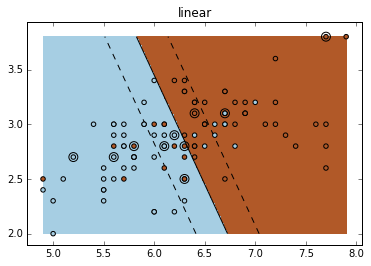

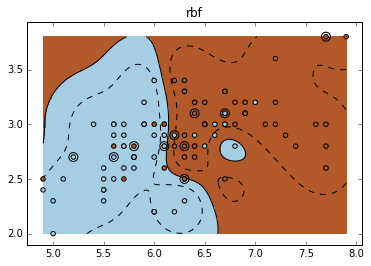

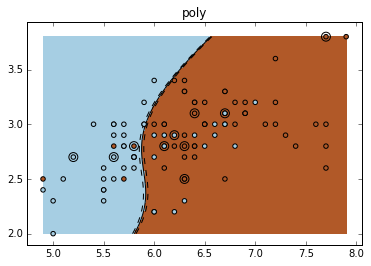

In [285]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:.9 * n_sample]
y_train = y[:.9 * n_sample]
X_test = X[.9 * n_sample:]
y_test = y[.9 * n_sample:]

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()


